In [ ]:
!pip install praat-parselmouth
!pip install --upgrade librosa
!pip install librosa scipy
!pip install datasets
!pip install pysptk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 81.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysptk: filename=pysptk-1.0.1-cp310-cp310-linux_x86_64.whl size=1241915 sha256=3230ff03954f59427f6dcf82a783ee5415135acaa0b6535e8874e0726c445b71
  Stored in directory: /root/.cache/pip/wheels/ba/c2/7f/73c54e1795e

In [ ]:
import pandas as pd
import numpy as np
import librosa
import parselmouth
from parselmouth.praat import call
import scipy.stats as stats

In [ ]:
import scipy
from scipy.signal import lfilter #hamming
import pysptk
from scipy.io import wavfile
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os

Mounted at /content/drive


## Load File

In [ ]:
df = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/IEMOCAP/IEMOCAP_Updated.csv')

In [ ]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,...,Valence,Dominance,dimension,category,act,val,dom,New_Category,Final_class,Unnamed: 20
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 3]","[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4",Nervous,NaN,NaN
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[4, 4]","[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4",Nervous,NaN,NaN
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4",Nervous,NaN,NaN
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4",Nervous,NaN,NaN
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[4, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4",Nervous,NaN,NaN


In [ ]:
import ast

# Apply ast.literal_eval to convert string to list
df['category'] = df['category'].apply(lambda x: ast.literal_eval(x))
print(type(df['category'].iloc[0]))

<class 'list'>


In [ ]:
import pandas as pd
from collections import Counter

# Step 1: Copy df to new_df
new_df = df.copy()

# Step 2: Function to find the most repeated label (case insensitive)
def find_most_repeated_label(label_list):
    # Convert all items to lowercase
    lower_case_labels = [label.lower() for label in label_list]

    # Count the occurrences of each label
    label_counts = Counter(lower_case_labels)

    # Find the label(s) that repeat more than once
    most_common_label, count = label_counts.most_common(1)[0]  # Get the most common label

    # If it repeats more than once, return it, otherwise return None
    if count > 1:
        return most_common_label
    else:
        return None

# Step 3: Apply the function to each row in the 'category' column and create a new column 'most_repeated_label'
new_df['most_repeated_label'] = new_df['category'].apply(lambda x: find_most_repeated_label(x))


In [ ]:
df=new_df

In [ ]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,...,Dominance,dimension,category,act,val,dom,New_Category,Final_class,Unnamed: 20,most_repeated_label
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","[Frustration, Fear, Excited]","2,4","3,3","4,4",Nervous,NaN,NaN,None
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","[Frustration, Fear, Excited]","2,5","2,2","3,4",Nervous,NaN,NaN,None
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","[Fear, Fear, Excited]","2,4","3,3","3,4",Nervous,NaN,NaN,fear
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","[Frustration, Fear, Excited]","3,5","3,2","3,4",Nervous,NaN,NaN,None
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","[Fear, Fear, Excited]","2,4","2,3","3,4",Nervous,NaN,NaN,fear


In [ ]:
df = df.drop(columns=['act', 'val', 'dom', 'New_Category', 'Final_class', 'Unnamed: 20'])
df = df.drop(columns=['Major_Emotion', 'Major_emotion','Major', 'Arousal', 'Valence', 'Dominance', 'dimension'])

In [ ]:
df['Audio_Uttrance_Path'] = df['Audio_Uttrance_Path'].str.replace('/content/drive/My Drive', '/content/drive/Shareddrives/CS298')

In [ ]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Audio_Uttrance_Path,category,most_repeated_label
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,/content/drive/Shareddrives/CS298/CS 297/IEMOC...,"[Frustration, Fear, Excited]",None
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,/content/drive/Shareddrives/CS298/CS 297/IEMOC...,"[Frustration, Fear, Excited]",None
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,/content/drive/Shareddrives/CS298/CS 297/IEMOC...,"[Fear, Fear, Excited]",fear
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,/content/drive/Shareddrives/CS298/CS 297/IEMOC...,"[Frustration, Fear, Excited]",None
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,/content/drive/Shareddrives/CS298/CS 297/IEMOC...,"[Fear, Fear, Excited]",fear


In [ ]:
df = df[df['most_repeated_label'].notna()]
len(df)

7766

In [ ]:
df['Audio_Uttrance_Path'].iloc[0]

'/content/drive/Shareddrives/CS298/CS 297/IEMOCAP/Session4/Audio_Uttrances/Ses04F_script03_1/Ses04F_script03_1_M001.wav'

## Test the audio Sample

In [ ]:
import librosa
import numpy as np
import scipy
from scipy.signal import lfilter #, hamming
import pysptk
from scipy.io import wavfile
def extract_extended_features(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=16000, mono=True)

    # Reduce noise using noisereduce
    # y = nr.reduce_noise(y=y, sr=sr, thresh_n_mult_nonstationary=2, stationary=False)

    # Features dictionary
    features = {}

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45)
    for i, mfcc in enumerate(mfccs):
        features[f'MFCC_{i}'] = np.mean(mfcc)

    # Pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_mean = np.mean(pitches[pitches > 0])
    pitch_std = np.std(pitches[pitches > 0])
    features['Pitch_mean'] = pitch_mean
    features['Pitch_std'] = pitch_std

    # Energy
    rmse = librosa.feature.rms(y=y)
    features['Energy_mean'] = np.mean(rmse)
    features['Energy_std'] = np.std(rmse)

    # Spectral Centroid
    spec_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['Spectral_Centroid_mean'] = np.mean(spec_centroids)
    features['Spectral_Centroid_std'] = np.std(spec_centroids)

    # Spectral Bandwidth, Rolloff, RMS Energy
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    features['Spectral_Bandwidth_Mean'] = np.mean(spectral_bandwidth)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features['Spectral_Rolloff_Mean'] = np.mean(rolloff)
    rms_energy = librosa.feature.rms(y=y)
    features['RMS_Energy_Mean'] = np.mean(rms_energy)

    # Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    for i, chroma in enumerate(chroma_stft):
        features[f'Chroma{i}'] = np.mean(chroma)

    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    features['ZCR_mean'] = np.mean(zcr)
    features['ZCR_std'] = np.std(zcr)

    # Loudness (using Energy)
    S, phase = librosa.magphase(librosa.stft(y))
    rms_s = librosa.feature.rms(S=S)
    features['Loudness'] = np.mean(librosa.amplitude_to_db(rms_s, ref=np.max))

    # Mel-Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    features['Mel_Spec_Mean'] = np.mean(mel_spec)

    # LPC - Linear Predictive Coefficients
    lpc_coefficients = librosa.lpc(y, order=10)
    for i, coeff in enumerate(lpc_coefficients):
        features[f'LPC_{i}'] = coeff

    return features


In [ ]:
x = extract_extended_features(df['Audio_Uttrance_Path'][0])

## Feature Extraction

In [ ]:
import time
import pandas as pd
from tqdm import tqdm

features_list = []

for index, row in tqdm(df.iterrows(), total=len(df), desc="Extracting features"):
    features = extract_extended_features(row['Audio_Uttrance_Path'])
    features['Emotion'] = row['most_repeated_label']
    features['Speaker_id'] = row['Speaker_id']
    features_list.append(features)

Extracting features: 100%|██████████| 7766/7766 [1:25:48<00:00,  1.51it/s]


In [ ]:
df = pd.DataFrame(features_list)
df.to_csv("features_major_audio_iemocap.csv", index=False)

In [ ]:
features_df = pd.read_csv("features_major_audio_iemocap.csv")

In [ ]:
features_df.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10,Emotion,Speaker_id
0,-307.39908,139.353800,-55.655650,35.709640,-24.282598,-8.041899,-15.103068,-7.157279,-6.234849,4.638666,...,-4.981248,4.880449,-4.198057,3.281164,-2.435601,1.757024,-1.040697,0.348874,fear,Ses04F_script03_1_M001
1,-381.90393,112.582710,-28.641914,41.377426,-14.992126,13.524288,-15.060655,0.119445,-9.428418,12.295826,...,-3.461308,3.362551,-3.217988,2.886278,-2.236722,1.461330,-0.787530,0.277015,fear,Ses04F_script03_1_M002
2,-352.65040,68.832466,-20.212467,16.935734,-22.049334,8.931537,-15.522003,-6.032152,-2.046423,5.841473,...,-3.112117,3.180664,-2.962393,2.690530,-2.234719,1.561520,-0.864859,0.355253,excited,Ses04F_script03_1_F005
3,-421.58063,112.043160,-17.711933,36.504970,-16.693695,13.678688,-12.622215,6.954138,-11.975268,12.579329,...,-2.220973,2.340549,-2.228829,1.871353,-1.385259,1.110445,-0.731721,0.259866,excited,Ses04F_script03_1_M006
4,-375.73666,87.983460,-6.579814,40.463875,-16.663486,-0.006745,-16.591385,5.656930,-15.612323,1.732160,...,-2.902323,2.735996,-2.665594,2.337090,-1.815214,1.168272,-0.410207,0.110669,excited,Ses04F_script03_1_F006


In [ ]:
def extract_emotions(emotion_string):
    emotions = emotion_string.strip("[]").replace("'", "").split(", ")
    return emotions

features_df['Extracted_Emotions'] = features_df['Emotion'].apply(extract_emotions)

In [ ]:
features_df['Extracted_Emotions'] = features_df['Extracted_Emotions'].apply(lambda x: [value.lower() for value in x])

# Function to find most common category value
def most_common_category(row):
    categories = row['Extracted_Emotions']
    counts = {}
    for category in categories:
        counts[category] = counts.get(category, 0) + 1
    return max(counts, key=counts.get)

features_df['main_emotion'] = features_df.apply(most_common_category, axis=1)


In [ ]:
features_df.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10,Emotion,Speaker_id,Extracted_Emotions,main_emotion
0,-307.39908,139.353800,-55.655650,35.709640,-24.282598,-8.041899,-15.103068,-7.157279,-6.234849,4.638666,...,-4.198057,3.281164,-2.435601,1.757024,-1.040697,0.348874,fear,Ses04F_script03_1_M001,[fear],fear
1,-381.90393,112.582710,-28.641914,41.377426,-14.992126,13.524288,-15.060655,0.119445,-9.428418,12.295826,...,-3.217988,2.886278,-2.236722,1.461330,-0.787530,0.277015,fear,Ses04F_script03_1_M002,[fear],fear
2,-352.65040,68.832466,-20.212467,16.935734,-22.049334,8.931537,-15.522003,-6.032152,-2.046423,5.841473,...,-2.962393,2.690530,-2.234719,1.561520,-0.864859,0.355253,excited,Ses04F_script03_1_F005,[excited],excited
3,-421.58063,112.043160,-17.711933,36.504970,-16.693695,13.678688,-12.622215,6.954138,-11.975268,12.579329,...,-2.228829,1.871353,-1.385259,1.110445,-0.731721,0.259866,excited,Ses04F_script03_1_M006,[excited],excited
4,-375.73666,87.983460,-6.579814,40.463875,-16.663486,-0.006745,-16.591385,5.656930,-15.612323,1.732160,...,-2.665594,2.337090,-1.815214,1.168272,-0.410207,0.110669,excited,Ses04F_script03_1_F006,[excited],excited


## EMotions updation

In [ ]:
unique_values_count = features_df['Emotion'].nunique()
print("Number of unique values in the 'Emotion' column:", unique_values_count)

Number of unique values in the 'Emotion' column: 10


In [ ]:
# Strip and convert to lowercase all values in the 'Emotion' column
features_df['Emotion'] = features_df['Emotion'].str.strip().str.lower()

In [ ]:
features_df.dropna(subset=['Emotion'], inplace=True)

In [ ]:
emotion_counts = features_df['Emotion'].str.strip().str.lower().value_counts()

# Print unique values along with their counts
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

frustration: 2026
neutral: 1710
excited: 1174
sadness: 1075
anger: 1042
happiness: 586
surprise: 102
fear: 34
other: 14
disgust: 3


In [ ]:
import pandas as pd

# Modify the labels according to the merging criteria
features_df['Emotion'] = features_df['Emotion'].replace({
    'frustration': 'anger',   # Merge 'frustration' into 'anger'
    'excited': 'happy',       # Merge 'excited' into 'happy'
    'happiness': 'happy'      # Merge 'happiness' into 'happy'
})

# Drop rows with the labels: 'surprise', 'fear', 'other', and 'disgust'
features_df = features_df[~features_df['Emotion'].isin(['surprise', 'fear', 'other', 'disgust'])]

# Print updated value counts to verify
print(features_df['Emotion'].value_counts())

Emotion
anger      3068
happy      1760
neutral    1710
sadness    1075
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X = features_df.iloc[:, :81]
y = features_df['Emotion']

In [ ]:
y

,Emotion
2,happy
3,happy
4,happy
5,happy
6,happy
...,...
7761,neutral
7762,happy
7763,sadness
7764,happy


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

## Train-Test SPlit


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data
for train_index, test_index in sss.split(X_scaled, y_categorical):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

# Reshape input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Defining the model
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=1, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6958 - loss: 0.7320 - val_accuracy: 0.5788 - val_loss: 1.0132
Epoch 2/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7166 - loss: 0.7008 - val_accuracy: 0.5895 - val_loss: 1.0078
Epoch 3/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7374 - loss: 0.6478 - val_accuracy: 0.5846 - val_loss: 1.0369
Epoch 4/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7478 - loss: 0.6231 - val_accuracy: 0.5788 - val_loss: 1.0562
Epoch 5/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7631 - loss: 0.5854 - val_accuracy: 0.5846 - val_loss: 1.0609
Epoch 6/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7708 - loss: 0.5782 - val_accuracy: 0.5681 - val_loss: 1.1366
Epoch 7/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8002 - loss: 0.5173 - val_accuracy: 0.5788 - val_loss: 1.1292
Epoch 8/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8039 - loss: 0.5031 - val_accuracy: 0.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test accuracy: {accuracy*100:.2f}%')

Test accuracy: 58.17%


In [ ]:
from sklearn.metrics import f1_score
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

#  F1 score
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'F1 Score: {f1:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score: 0.5822


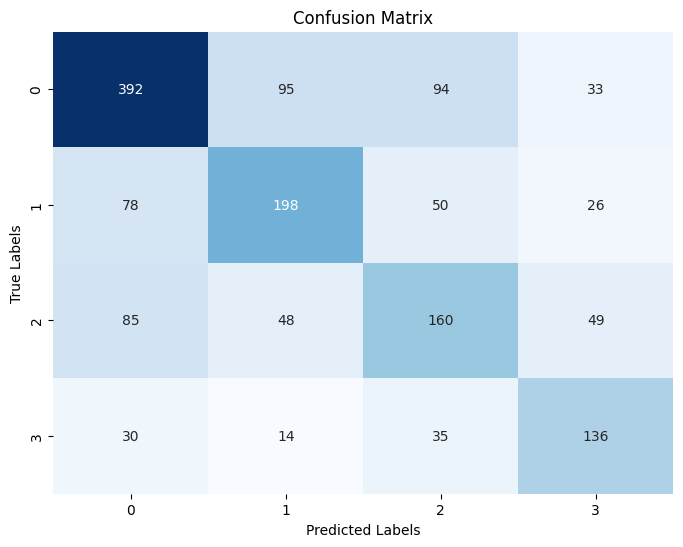

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Attention
from tensorflow.keras.models import Model

def build_model(hp):
    inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    x = Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), return_sequences=True))(inputs)
    x = Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05))(x)
    # Attention layer
    query_value_attention_seq = Attention()([x, x])
    x = LSTM(64)(query_value_attention_seq)
    outputs = Dense(y_categorical.shape[1], activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

import keras_tuner as kt

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    directory='my_dir',
    project_name='keras_tuner_bilstm'
)

tuner.search(X_train_reshaped, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])


Trial 15 Complete [00h 00m 17s]
val_accuracy: 0.5837438702583313

Best val_accuracy So Far: 0.6001641750335693
Total elapsed time: 00h 04m 23s


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

In [ ]:
def transformer_encoder(inputs):
    # Multi-head self-attention
    x = MultiHeadAttention(num_heads=2, key_dim=2)(inputs, inputs)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed-forward neural network
    ffnn = Dense(units=inputs.shape[-1], activation='relu')(x)
    ffnn_output = Dense(units=inputs.shape[-1])(ffnn)
    x = Dropout(0.1)(ffnn_output)
    encoder_output = LayerNormalization(epsilon=1e-6)(x + ffnn_output)
    return encoder_output

In [ ]:
input_shape = X_train_reshaped.shape[1:]  # Example: (sequence_length, feature_dim)
inputs = Input(shape=input_shape)
x = transformer_encoder(inputs)
x = GlobalAveragePooling1D()(x)
outputs = Dense(y_categorical.shape[1], activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1, 81)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 1, 81)          │          1,389 │ input_layer_1[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 1, 81)          │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 81)          │              0 │ dropout_2[0][0],       │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 1, 81)          │            162 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1, 81)          │          6,642 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1, 81)          │          6,642 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 1, 81)          │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 1, 81)          │              0 │ dropout_3[0][0],       │
│                           │                        │                │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 1, 81)          │            162 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 81)             │              0 │ layer_normalization_1… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4)              │            328 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,325 (59.86 KB)

 Trainable params: 15,325 (59.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the Transformer model
history = model.fit(X_train_reshaped, y_train,
                    epochs=50,
                    batch_size=34,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.3345 - loss: 1.7298 - val_accuracy: 0.4195 - val_loss: 1.2740
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4412 - loss: 1.2603 - val_accuracy: 0.4589 - val_loss: 1.1887
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4711 - loss: 1.1840 - val_accuracy: 0.4770 - val_loss: 1.1414
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5029 - loss: 1.1283 - val_accuracy: 0.4951 - val_loss: 1.1141
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5227 - loss: 1.0974 - val_accuracy: 0.5041 - val_loss: 1.1030
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 1.1061 - val_accuracy: 0.5156 - val_loss: 1.0852
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5315 - loss: 1.0640 - val_accuracy: 0.5279 - val_loss: 1.0761
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5409 - loss: 1.0563 - val_accuracy: 0.5296 - va

In [ ]:
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = np.mean(y_pred == y_true)
print(f'Transformer Model Accuracy: {accuracy:.4f}')

# F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Transformer Model F1 Score: {f1:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step
Transformer Model Accuracy: 0.5837
Transformer Model F1 Score: 0.5738


#openSmile


In [ ]:
!pip install pyopensmile

ERROR: Could not find a version that satisfies the requirement pyopensmile (from versions: none)
ERROR: No matching distribution found for pyopensmile


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.3846 - loss: 1.3121 - val_accuracy: 0.5140 - val_loss: 1.1172
Epoch 2/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4647 - loss: 1.1406 - val_accuracy: 0.5427 - val_loss: 1.0673
Epoch 3/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5244 - loss: 1.0725 - val_accuracy: 0.5509 - val_loss: 1.0510
Epoch 4/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5355 - loss: 1.0408 - val_accuracy: 0.5624 - val_loss: 1.0283
Epoch 5/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5646 - loss: 1.0200 - val_accuracy: 0.5640 - val_loss: 1.0400
Epoch 6/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 1.0107 - val_accuracy: 0.5624 - val_loss: 1.0258
Epoch 7/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5740 - loss: 0.9837 - val_accuracy: 0.5739 - val_loss: 1.0143
Epoch 8/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5796 - loss: 0.9830 - val_accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6260 - loss: 0.9415
Test Accuracy: 60.60%


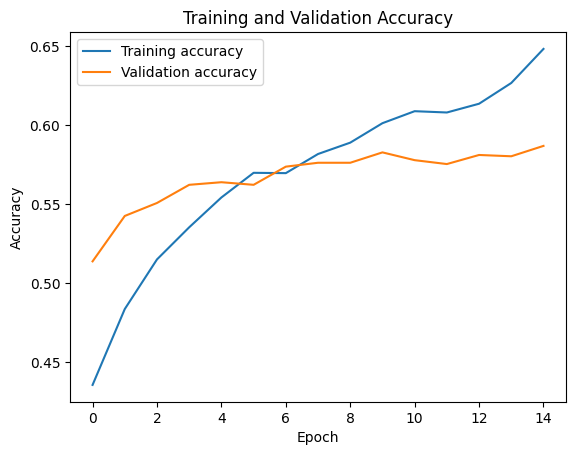

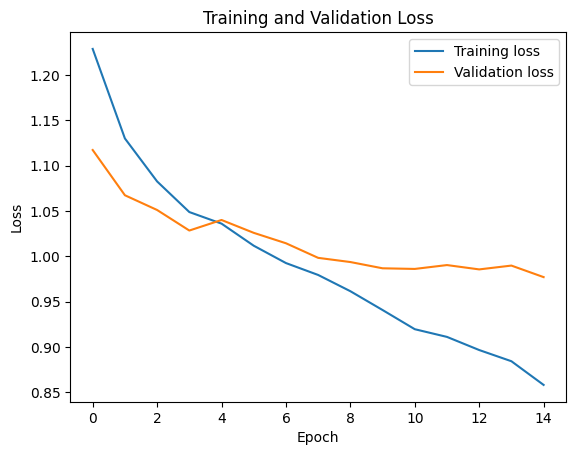

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(256),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# optimizer = Adam(learning_rate=0.0001)
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.2747 - loss: 1.8784 - val_accuracy: 0.4573 - val_loss: 1.2004
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.5562 - val_accuracy: 0.5033 - val_loss: 1.1379
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3840 - loss: 1.4691 - val_accuracy: 0.5140 - val_loss: 1.1084
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4289 - loss: 1.3673 - val_accuracy: 0.5238 - val_loss: 1.0896
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4164 - loss: 1.3956 - val_accuracy: 0.5271 - val_loss: 1.0813
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4413 - loss: 1.3377 - val_accuracy: 0.5312 - val_loss: 1.0761
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4394 - loss: 1.3304 - val_accuracy: 0.5337 - val_loss: 1.0674
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4561 - loss: 1.2736 - val_accuracy: 0

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5999 - loss: 0.9798
Test Accuracy: 58.04%


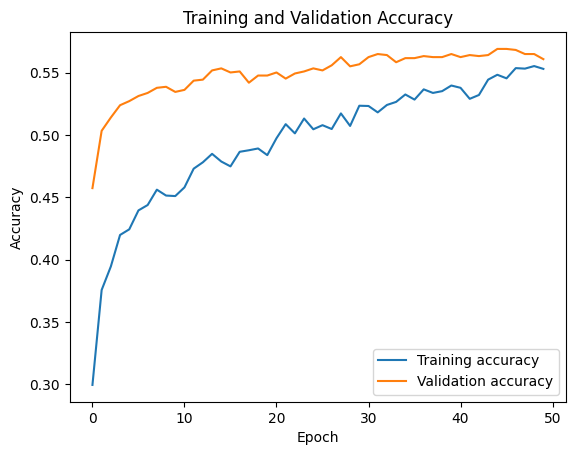

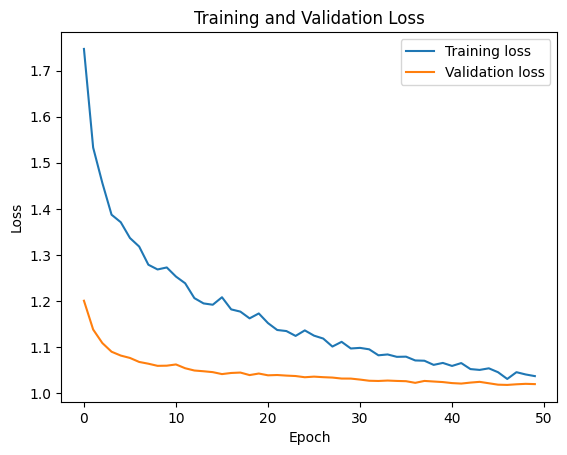

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model 3


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5554 - loss: 1.0238 - val_accuracy: 0.5624 - val_loss: 1.0189
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5669 - loss: 1.0277 - val_accuracy: 0.5657 - val_loss: 1.0175
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5602 - loss: 1.0357 - val_accuracy: 0.5690 - val_loss: 1.0166
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5681 - loss: 1.0114 - val_accuracy: 0.5673 - val_loss: 1.0162
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5676 - loss: 1.0225 - val_accuracy: 0.5673 - val_loss: 1.0182
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5670 - loss: 1.0028 - val_accuracy: 0.5681 - val_loss: 1.0152
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 1.0351 - val_accuracy: 0.5706 - val_loss: 1.0169
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5591 - loss: 1.0137 - val_accu

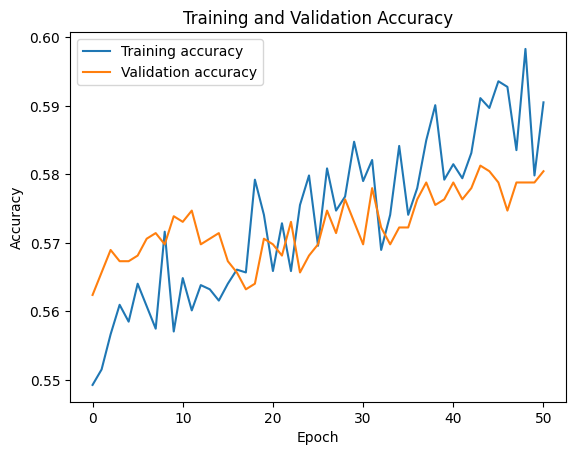

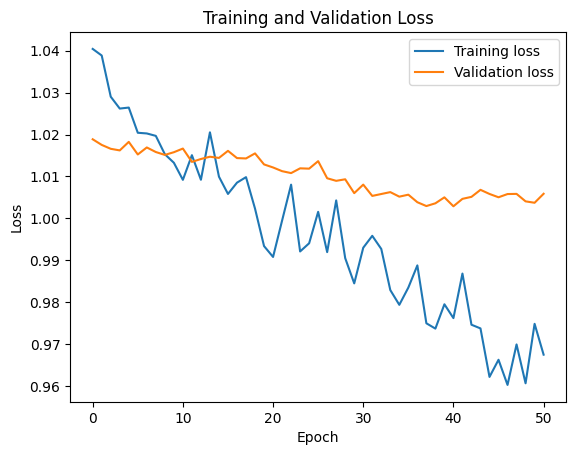

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6256 - loss: 0.9632
Test Accuracy: 60.14%


##LSTM


## MelSpectogram

In [ ]:
import pandas as pd
import librosa
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

def extract_melspectrogram(audio_path, sr=22050, n_mels=128, figsize=(128, 128)):
  """Extracts melspectrogram from an audio file.

  Args:
      audio_path: Path to the audio file.
      sr: Sampling rate (default: 22050).
      n_mels: Number of mel filters (default: 128).
      figsize: Desired output image size (default: (128, 128)).

  Returns:
      A NumPy array representing the melspectrogram image.
  """
  y, _ = librosa.load(audio_path, sr=sr)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
  # Normalize mel spectrogram to [0, 1] range
  mel_spectrogram = librosa.power_to_db(mel_spectrogram).astype("float32") / 80
  return librosa.feature.inverse.mel_to_image(mel_spectrogram, figsize=figsize)

def create_melspectrogram_dataset(df, audio_path_col="Audio_Uttrance_Path", target_col="New_Category", image_size=(128, 128)):
  """Creates a dataset of mel spectrograms and labels from a DataFrame.

  Args:
      df: Pandas DataFrame containing audio data.
      audio_path_col: Column name containing audio file paths (default: "Audio_Uttrance_Path").
      target_col: Column name containing class labels (default: "New_Category").
      image_size: Desired image size (default: (128, 128)).

  Returns:
      A tuple containing training and validation data generators.
  """
  X = []
  y = []
  for index, row in tqdm(df.iterrows(), total=len(df), desc="Extracting features"):
    audio_path = row[audio_path_col]
    mel_spectrogram = extract_melspectrogram(audio_path, figsize=image_size)
    X.append(mel_spectrogram)
    y.append(row[target_col])

  X = np.array(X)
  y = np.array(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
  val_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
  val_generator = val_datagen.flow(X_test, y_test, batch_size=32)

  return train_generator, val_generator

def build_model(input_shape):
  """Builds a CNN model for audio classification using mel spectrograms.

  Args:
      input_shape: Shape of the input image (e.g., (128, 128, 1)).

  Returns:
      A compiled Keras model.
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation="relu"))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(len(class_labels), activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

  return model


In [ ]:
# Define paths and hyperparameters
audio_path_col = "Audio_Uttrance_Path"
target_col = "New_Category"
image_size = (128, 128)
epochs = 50  # Adjust this as needed

# Create mel spectrogram dataset
train_generator, val_generator = create_melspectrogram_dataset(df, audio_path_col, target_col, image_size)

# Get the number of unique emotion categories
num_classes = len(set(df[target_col]))

# Build the CNN model
input_shape = train_generator.image_shape
model = build_model(input_shape)
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=3)

# Train the model
model_history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[early_stopping])

# Evaluate the model on the test set (replace with actual test data if available)
test_generator = create_melspectrogram_dataset(df.iloc[int(0.8*len(df)):], audio_path_col, target_col, image_size)  # Assuming 80% for training, 20% for testing
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_melspectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    fig, ax = plt.subplots(figsize=(5, 3))
    img = librosa.display.specshow(mel_spec_db, ax=ax, x_axis='time', y_axis='mel')
    fig.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# Loop through audio files and extract mel-spectrograms
for i, audio_path in enumerate(df['Audio_Uttrance_Path']):
    save_path = f'melspecs/melspec_{i}.png'
    extract_melspectrogram(audio_path, save_path)